# Sketch Quality Analysis (With CLIP)

The quickdraw dataset includes some invalid images since they were crowd sourced. (anyone could contribute to the dataset)

https://colinmorris.github.io/blog/bad_flamingos

In [12]:
from experiment_dir import set_cwd_project_root

set_cwd_project_root()

In [13]:
from transformers import CLIPProcessor, CLIPModel

# pip install transformers

# https://huggingface.co/openai/clip-vit-large-patch14
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

In [ ]:
from raster_dataset import svg_rasterize
from IPython.display import display, HTML
from dataset import QuickDrawDataset
import torch

dataset = QuickDrawDataset(["cat"], download=True)
svgs = [dataset[0], dataset[8138], dataset[1234]]
rasterized_svgs = [svg_rasterize(svg) for svg in svgs]

text_inputs = ["a cat sketch", "random scribbles"]
inputs = processor(
    text=text_inputs, images=rasterized_svgs, return_tensors="pt", padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

# Rank images for each text label
for j, text in enumerate(text_inputs):
    scores = probs[:, j]
    ranking = torch.argsort(scores, descending=True)
    print(f"\nText: '{text}'")
    label_ranking = ""

    for rank, idx in enumerate(ranking):
        label_ranking += f"<div style='display:inline-block; width: 150px; background-color: white; margin-right:10px;'><b>Ranking {rank+1}, Probability: {scores[idx]:.2f}</b><br>{svgs[idx]}</div>"

    display(HTML(label_ranking))

Loading QuickDraw files: 1it [00:03,  3.23s/it]



Text: 'a cat sketch'



Text: 'random scribbles'


[0.2631801664829254, 0.2578684091567993, 0.26304465532302856, 0.27860087156295776, 0.256212055683136]
Cosine similarity for image 0: 0.263


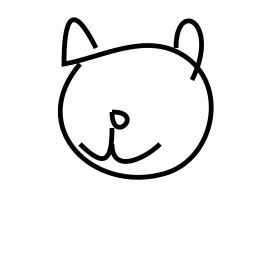

Cosine similarity for image 1: 0.258


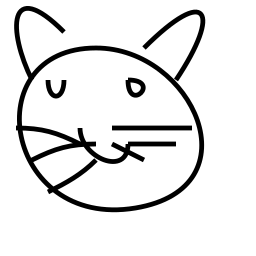

Cosine similarity for image 2: 0.263


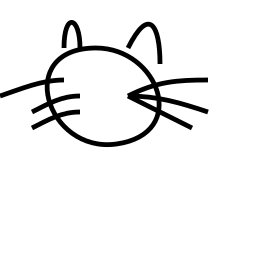

Cosine similarity for image 3: 0.279


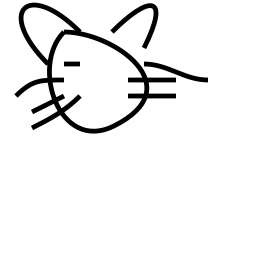

Cosine similarity for image 4: 0.256


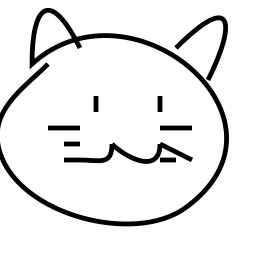

In [17]:
from IPython.display import display, HTML
from raster_dataset import svg_rasterize
import torch

# Score some generated sketches

svgs = [
    '''<svg viewBox="0 0 16 16" width="256" xmlns="http://www.w3.org/2000/svg"><g stroke-width="0.3"><path d="M5,4C1.5980815987821058,7.954705010934168 5.829562115406069,12.16446278597964 10.331840282494484,10.834079858752759C13.407734121276642,9.925180742080792 14.35784283448167,5.280762167549656 11.457825406177731,3.4578254061777316C9.094640060681382,1.9723386645479792 6.320747289736058,3.605134367623232 4,4C4,1.2702356377553512 4.458381133296262,-0.08323773340747209 6,3M11,3C11,-0.15328927618956945 13.787719505188134,1.4245609896237323 12,5M7,7C9.145911184474024,7 7,9.145911184474024 7,7M7,8C7,9.99146926364511 6.601998177531808,10.601998177531808 5,9M7,9C7,10.924899154956652 9.099954585434894,9.900045414565106 10,9" fill="none" stroke="#000000" /></g></svg>''',
    '''<svg viewBox="0 0 16 16" width="256" xmlns="http://www.w3.org/2000/svg"><g stroke-width="0.3"><path d="M6,3C-1.5626827686130484,3 0.2617857750304413,14.36635183727429 8.467703142927903,13C16.01917904347402,11.742617978191095 12.055783999776935,3 6,3M2,5C0.47254495054657863,1.9450899010931573 0.49015627728326994,-1.50984372271673 4,2M9,3C12.95127344953395,-0.9512734495339492 13.885866081728164,0.6712008774077471 11,5M3,5C3,6.346891860317536 4,6.346891860317539 4,5M8,5C8,7.145911184474025 10.145911184474024,5 8,5M5,8C5,9.880364030138601 8,11.088040063351517 8,9M7,8C8.666666666666668,8 10.333333333333332,8 12,8M8,9C9,9 10.000000000000002,9 11,9M7,9C7.666666666666666,9.33333333333333 8.333333333333334,9.666666666666668 9,10M5,9C3.5403607406362134,8.27018037031811 2.6346602502667382,8 1,8M6,9C4.365339749733259,9 3.4596392593637884,9.270180370318108 2,10M6,10C5.076508988395309,10.92349101160469 4.163730400027089,11.418134799986452 3,12" fill="none" stroke="#000000" /></g></svg>''',
    '''<svg viewBox="0 0 16 16" width="256" xmlns="http://www.w3.org/2000/svg"><g stroke-width="0.3"><path d="M6,3C0.8250294948402317,3 2.8885637501499817,9.622257717494444 7.283409279518435,9C11.881811854389536,8.348921032323279 9.913400589438144,3 6,3M4,3C4,0.7336688541880112 5,1.001830041202835 5,3M8,3C9.307642998871716,0.3847140022565765 10,1.526890957578396 10,4M8,6C9.792699362160473,5.1036503189197635 11.004396610637814,5 13,5M8,6C9.846982023209383,6 11.254404399959363,6.418134799986456 13,7M8,6C9.333333333333332,6.666666666666666 10.666666666666668,7.333333333333334 12,8M4,5C2.5915954203862057,5 1.3280239228913826,5.557325359036204 0,6M5,6C3.8264744518893496,6 3.0393941065414376,6.4803029467292825 2,7M5,7C3.826474451889349,7 3.0393941065414376,7.4803029467292825 2,8" fill="none" stroke="#000000" /></g></svg>''',
    '''<svg viewBox="0 0 16 16" width="256" xmlns="http://www.w3.org/2000/svg"><g stroke-width="0.3"><path d="M4,2C1.8742623008745398,4.125737699125461 3.6973821788727768,9.592773420232472 7.1297087417930145,7.8702912582069855C11.98016407960132,5.436133947147459 7.096036300231498,2 4,2M3,4C-0.2869182920652067,0.7130817079347933 1.7028483691727065,-1.2971516308272975 5,2M7,2C9.307187820256244,-0.3071878202562486 10.692421821560812,-0.3848436431216369 9,3M4,5C2.5593684413210753,5 2.033470480680214,4.966529519319784 1,6M4,6C3.333333333333332,6.333333333333333 2.666666666666668,6.666666666666669 2,7M5,6C4.0765089883953065,6.9234910116046935 3.163730400027091,7.4181347999864515 2,8M9,4C10.485792019722611,4 11.51420798027739,5 13,5M8,5C9,5 10.000000000000002,5 11,5M8,6C8.999999999999998,6 10.000000000000002,6 11,6M4,4C4.333333333333333,4 4.666666666666667,4 5,4" fill="none" stroke="#000000" /></g></svg>''',
    '''<svg viewBox="0 0 16 16" width="256" xmlns="http://www.w3.org/2000/svg"><g stroke-width="0.3"><path d="M3,4C1.4507636173480398,5.54923638265196 -0.8230903664715775,6.962307848269955 0,9.541493682588602C1.2488112860205032,13.454692657870929 8.39919942322328,15.283259670008723 11.573131364758819,13C19.164972949129258,7.538589349114418 8.25263005715506,-1.6602397571760497 2,4C2,0.24000513174550386 3.134134966318157,-0.731730067363686 5,3M11,3C14.562289138644047,-0.5622891386440476 14.809223780580837,1.3815524388383342 13,5M6,6C6,6.333333333333334 6,6.666666666666667 6,7M10,6C10,6.333333333333334 10,6.666666666666667 10,7M7,9C7,10.376850450263529 6.218171496678957,10 5,10M7,9C7.900045414565108,9.900045414565108 10,10.92489915495665 10,9M10,8C10.666666666666666,8 11.333333333333334,8 12,8M10,9C10.666666666666664,9.333333333333332 11.333333333333336,9.666666666666668 12,10M10,10C10.333333333333336,10 10.666666666666664,10 11,10M5,8C4.333333333333333,8 3.666666666666667,8 3,8M5,9C4.666666666666667,9 4.333333333333333,9 4,9M5,10C4.666666666666667,10 4.333333333333333,10 4,10" fill="none" stroke="#000000" /></g></svg>'''
]

text_prompt = "a cat sketch"

# Encode text
text_inputs = processor(text=[text_prompt], return_tensors="pt", padding=True)
with torch.no_grad():
    text_embeds = model.get_text_features(**text_inputs)

# Encode images
image_inputs = processor(images=rasterized_svgs, return_tensors="pt", padding=True)
with torch.no_grad():
    image_embeds = model.get_image_features(**image_inputs)

# Normalize embeddings to unit length
text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)

# Cosine similarity (higher = better match)
scores = (image_embeds @ text_embeds.T).squeeze().tolist()

print(scores)

for i, score in enumerate(scores):
    print(f"Cosine similarity for image {i}: {score:.3f}")
    display(rasterized_svgs[i])


In [ ]:
svgs_inline = ""
for i in range(20):
    original_svg = dataset[i]
    svgs_inline += f'<div style="display:inline-block; width: 150px; background-color: white; margin-right:10px;"><b>Original {i}</b><br>{original_svg}</div>'

display(HTML(svgs_inline))

# What about not scribbles, but not exactly cats

`dataset[7], dataset[14]`

In [ ]:
from raster_dataset import svg_rasterize
from IPython.display import display, HTML
from dataset import QuickDrawDataset
import torch

dataset = QuickDrawDataset(["cat"], download=True)
svgs = [
    dataset[0],
    dataset[8138],
    dataset[1234],
    dataset[7],
    dataset[14],
]
rasterized_svgs = [svg_rasterize(svg) for svg in svgs]

text_inputs = ["a cat sketch", "random scribbles"]
inputs = processor(
    text=text_inputs, images=rasterized_svgs, return_tensors="pt", padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

# Rank images for each text label
for j, text in enumerate(text_inputs):
    scores = probs[:, j]
    ranking = torch.argsort(scores, descending=True)
    print(f"\nText: '{text}'")
    label_ranking = ""

    for rank, idx in enumerate(ranking):
        label_ranking += f"<div style='display:inline-block; width: 150px; background-color: white; margin-right:10px;'><b>Ranking {rank+1}, Probability: {scores[idx]:.2f}</b><br>{svgs[idx]}</div>"

    display(HTML(label_ranking))

Loading QuickDraw files: 1it [00:03,  3.38s/it]



Text: 'a cat sketch'



Text: 'random scribbles'


In [ ]:
from raster_dataset import svg_rasterize
from IPython.display import display, HTML
from dataset import QuickDrawDataset
import torch

dataset = QuickDrawDataset(["cat"], download=True)
svgs = [dataset[i] for i in range(50)]
rasterized_svgs = [svg_rasterize(svg) for svg in svgs]

text_inputs = ["a cat sketch", "random scribbles"]
inputs = processor(
    text=text_inputs, images=rasterized_svgs, return_tensors="pt", padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

# Rank images for each text label
for j, text in enumerate(text_inputs):
    scores = probs[:, j]
    ranking = torch.argsort(scores, descending=True)
    print(f"\nText: '{text}'")
    label_ranking = ""

    for rank, idx in enumerate(ranking):
        label_ranking += f"<div style='display:inline-block; width: 150px; background-color: white; margin-right:10px;'><b>Ranking {rank+1}, Probability: {scores[idx]:.2f}</b><br>{svgs[idx]}</div>"

    display(HTML(label_ranking))

Loading QuickDraw files: 1it [00:03,  3.28s/it]



Text: 'a cat sketch'



Text: 'random scribbles'


In [ ]:
from raster_dataset import svg_rasterize
from IPython.display import display, HTML
from dataset import QuickDrawDataset
import torch

dataset = QuickDrawDataset(["cat"], download=True)
svgs = [dataset[i] for i in range(50)]
rasterized_svgs = [svg_rasterize(svg) for svg in svgs]

# for raster in rasterized_svgs:
#     display(raster)

text_inputs = ["good cat sketch", "bad cat sketch", "random scribbles"]
inputs = processor(
    text=text_inputs, images=rasterized_svgs, return_tensors="pt", padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

# Rank images for each text label
for j, text in enumerate(text_inputs):
    scores = probs[:, j]
    ranking = torch.argsort(scores, descending=True)
    print(f"\nText: '{text}'")
    label_ranking = ""

    for rank, idx in enumerate(ranking):
        label_ranking += f"<div style='display:inline-block; width: 150px; background-color: white; margin-right:10px;'><b>Ranking {rank+1}, Probability: {scores[idx]:.2f}</b><br>{svgs[idx]}</div>"

    display(HTML(label_ranking))

Loading QuickDraw files: 1it [00:03,  3.46s/it]



Text: 'good cat sketch'



Text: 'bad cat sketch'



Text: 'random scribbles'
